<a href="https://colab.research.google.com/github/BKHV/risk_models/blob/master/LGD%20competition%20baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Бэйзлайн по разработке LGD модели
Loss given default (LGD) объем активов Банка, который будет утерян в случае дефолта клиента, вычисляется как доля от задолженности на момент дефолта. Для задания подготовлен ситнетический набор данных

Для оценки качетсва модели испольуем метрику MAE
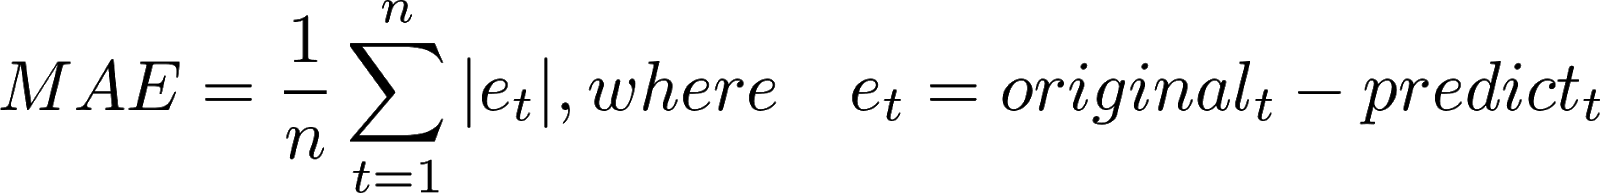


### Импортируем библиотеки

In [21]:
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from math import log
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

### Подгружаем данные

In [4]:
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-train.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-test.csv

--2021-03-11 12:28:29--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 411712 (402K) [text/plain]
Saving to: ‘LGD-data-train.csv’

LGD-data-train.csv  100%[===================>] 402.06K  --.-KB/s    in 0.03s   

2021-03-11 12:28:30 (15.1 MB/s) - ‘LGD-data-train.csv’ saved [411712/411712]

--2021-03-11 12:28:30--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152321 (

In [5]:
train_df = pd.read_csv('LGD-data-train.csv', sep=';')
test_df = pd.read_csv('LGD-data-test.csv', sep=';')

In [6]:
train_df.shape

(2091, 38)

In [7]:
test_df.shape

(822, 37)

Выборка содержит информацию по 2091 клиентам Банка. 2091 наблюдение в выборке для разработки 822 в тестовой выборке.

Полный список полей:

In [47]:
train_df.columns

Index(['record_id', 'ar_revenue', 'ar_total_expenses', 'ar_sale_cost',
       'ar_selling_expenses', 'ar_management_expenses', 'ar_sale_profit',
       'ar_balance_of_rvns_and_expns', 'ar_profit_before_tax', 'ar_taxes',
       'ar_other_profit_and_losses', 'ar_net_profit', 'ab_immobilized_assets',
       'ab_mobile_current_assets', 'ab_inventory', 'ab_accounts_receivable',
       'ab_other_current_assets', 'ab_cash_and_securities', 'ab_losses',
       'ab_own_capital', 'ab_borrowed_capital', 'ab_long_term_liabilities',
       'ab_short_term_borrowing', 'ab_accounts_payable', 'ab_other_borrowings',
       'bus_age', 'ogrn_age', 'adr_actual_age', 'head_actual_age',
       'cap_actual_age', 'ul_staff_range', 'ul_capital_sum', 'ul_founders_cnt',
       'ul_branch_cnt', 'ul_strategic_flg', 'ul_systematizing_flg', 'pledge',
       'LGD'],
      dtype='object')

In [8]:
train_df['LGD'].values.mean()

0.6598314748923959

Среднее значение LGD в выборке 65,98%

### График распределения фактического LGD

No handles with labels found to put in legend.


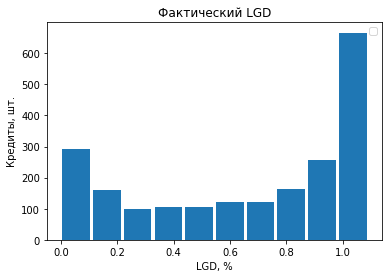

In [9]:
import matplotlib.pyplot as plt
plt.hist(train_df['LGD'].values, histtype='bar', rwidth=0.9)
plt.xlabel('LGD, %')
plt.ylabel('Кредиты, шт.')
plt.title('Фактический LGD')
plt.legend()
plt.show()

### Генерация фичей

Для бэйзлайна отбираем одну фичу - bus_age (срок ведения бизнеса). При самостоятельном выполнении задания, вы можете использовать все фичи, а так же создать новые самостоятельно

In [79]:
features = train_df[['bus_age']]
target = train_df[['LGD']]

### Моделирование деревом

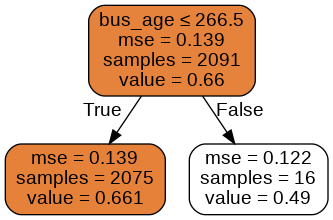

In [80]:
dtree = DecisionTreeRegressor(random_state=0, max_depth=1)
dtree.fit(features,target)
dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data, 
                feature_names = list(features.columns),
                filled = True, 
                rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [93]:
mean_absolute_error(target, dtree.predict(features))

0.3336954456743472

Метрика качества МАЕ при моделировании деревом = 33,37%

### Моделирование (регрессия)

In [94]:
l_r = LinearRegression()
l_r.fit(features, target)
mean_absolute_error(target, l_r.predict(features))

0.334134813791363

Метрика качества МАЕ при моделировании регрессией = 33,41%

### Submit

Наилучший результат показала регрессионная модель. Используем этот результат в submit файле

No handles with labels found to put in legend.


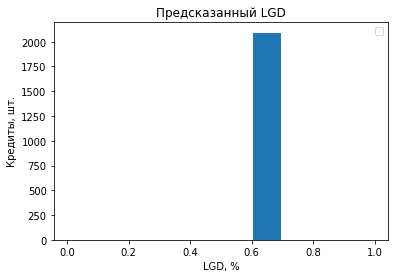

In [86]:
import matplotlib.pyplot as plt
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(l_r.predict(features), bins=bins, histtype='bar', rwidth=0.9)
plt.xlabel('LGD, %')
plt.ylabel('Кредиты, шт.')
plt.title('Предсказанный LGD')
plt.legend()
plt.show()

Текущая модель приблежает среднее, что неплохо для бейзлайна.

In [41]:
predictions = l_r.predict(test_df[features])

In [42]:
answ_df = test_df[['record_id']].copy()

In [43]:
answ_df['predictions'] = predictions

In [44]:
answ_df['predictions'].values.mean()

0.6599602305500525

Среднее значение предсказанного LGD в тестовой выборке 65,99%

In [45]:
answ_df.head()

,record_id,predictions
0,188,0.650290
1,213,0.663428
2,578,0.665851
3,743,0.663335
4,815,0.663145


Формируем submit файл

In [46]:
answ_df.to_csv('LGD-submit.csv', index=False)